In [9]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.util import ngrams

In [10]:
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

In [ ]:
df = pd.read_json('../Dataset_Clean.json')

In [12]:
def plot_top_ngrams(df, text_column, n, top_k=20):
    """
    Cleans text data, calculates the frequency of n-grams, and plots the top k results.

    Args:
        df (pd.DataFrame): The DataFrame containing the text data.
        text_column (str): The name of the column with the text.
        n (int): The 'n' for the n-grams (e.g., 1 for unigrams, 2 for bigrams).
        top_k (int, optional): The number of top n-grams to display. Defaults to 20.
    """
    # 1. Text Cleaning
    stop_words = set(stopwords.words('english'))

    # Concatenate all text into a single string, then clean
    full_text = ' '.join(df[text_column]).lower()
    full_text = full_text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize and remove stopwords
    all_words = [word for word in full_text.split() if word not in stop_words]

    # 2. N-gram Generation
    n_grams = ngrams(all_words, n)
    n_gram_counts = Counter(n_grams)

    # 3. Data Preparation for Plotting
    most_common_n_grams = n_gram_counts.most_common(top_k)

    # Check if any n-grams were found
    if not most_common_n_grams:
        print(f"No n-grams of size {n} found. The text might be too short.")
        return

    # Format the n-grams (tuples) into strings for labeling
    formatted_n_grams = [(' '.join(n_gram), count) for n_gram, count in most_common_n_grams]

    # Create a DataFrame for plotting
    n_gram_df = pd.DataFrame(formatted_n_grams, columns=['Ngram', 'Frequency'])

    # 4. Plotting
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Frequency', y='Ngram', data=n_gram_df, palette='magma', hue='Ngram', legend=False)


    # Dynamically set the plot title based on 'n'
    if n == 1:
        title = f'Top {top_k} Most Common Words (Unigrams)'
    elif n == 2:
        title = f'Top {top_k} Most Common Bigrams'
    elif n == 3:
        title = f'Top {top_k} Most Common Trigrams'
    else:
        title = f'Top {top_k} Most Common {n}-grams'

    plt.title(title, fontsize=16)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('N-gram', fontsize=12)
    plt.show()

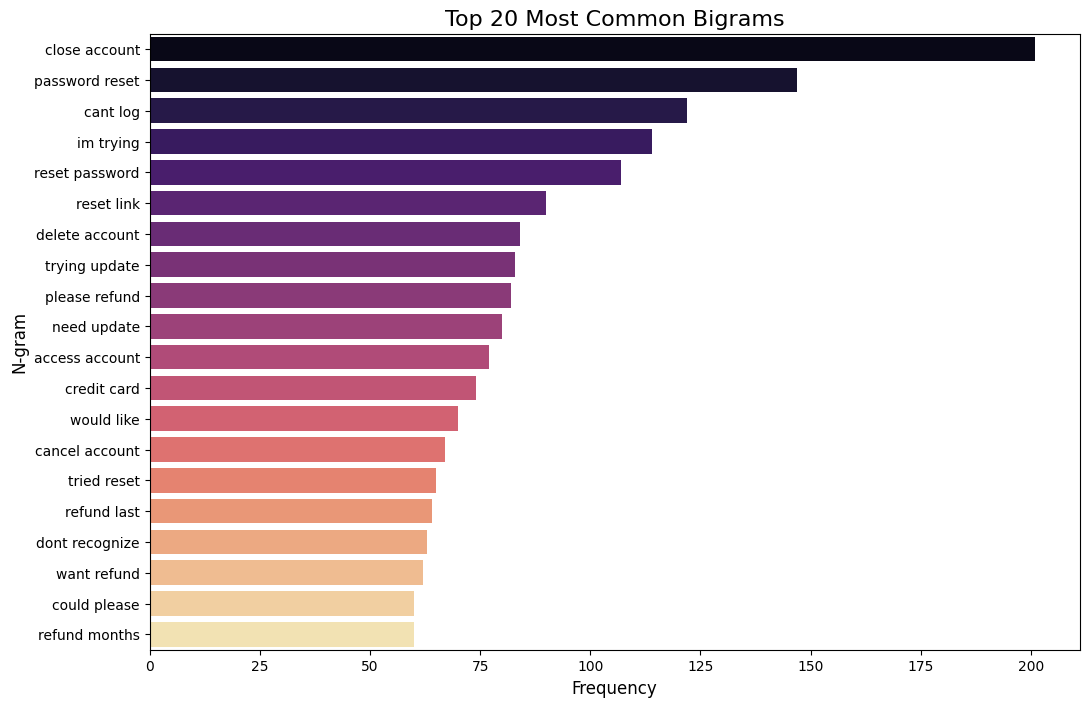

In [13]:
plot_top_ngrams(df, text_column='text', n=2)

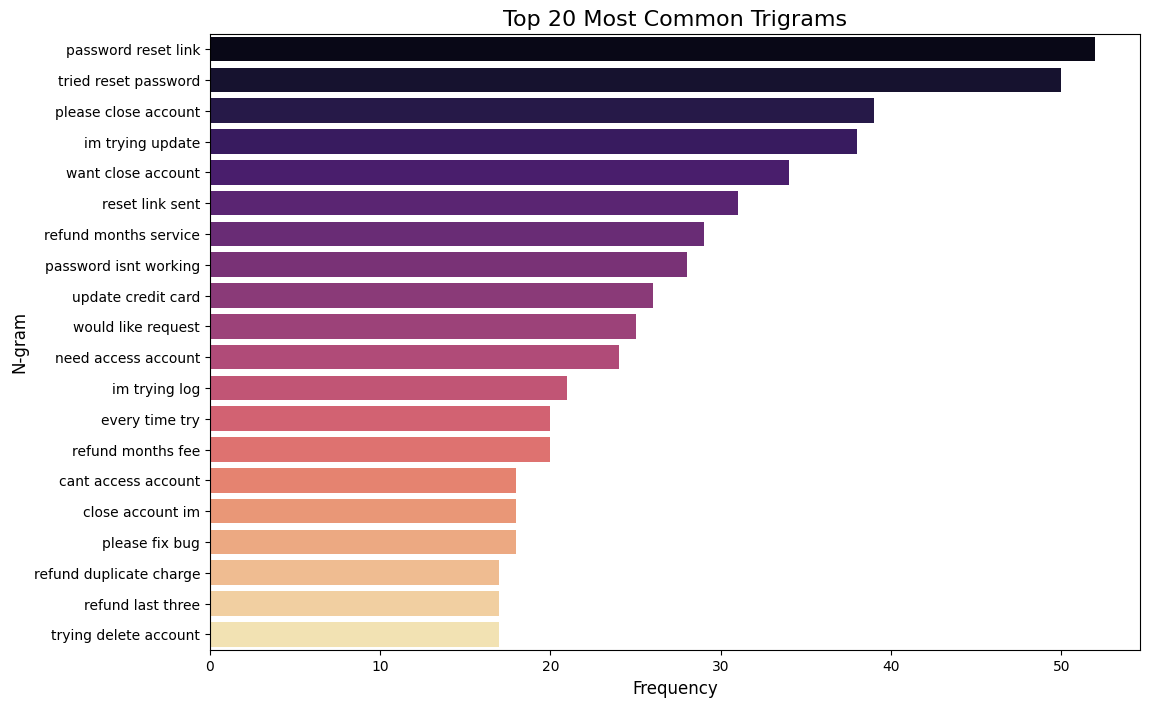

In [14]:
plot_top_ngrams(df, text_column='text', n=3)

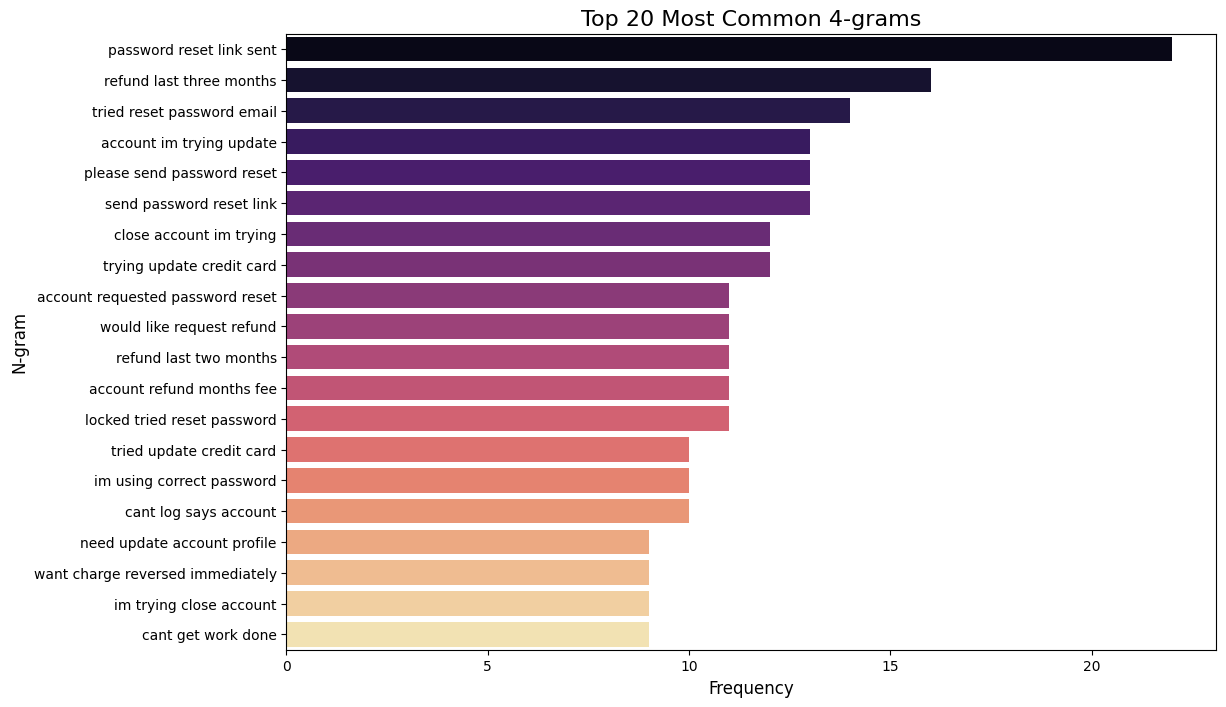

In [15]:
plot_top_ngrams(df, text_column='text', n=4)